## 二値分類モデル

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.options.display.max_columns = None

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## データの前処理

In [5]:
is_setosa = (dataset['species'] == 0).astype(np.int64)

dataset['is_setosa'] = is_setosa
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,is_setosa
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [6]:
Y = np.array(dataset['is_setosa'])
X = np.array(dataset[['petal_width', 'petal_length']])

In [7]:
print("Y=", Y.shape, ", X=", X.shape)

Y= (150,) , X= (150, 2)


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [9]:
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_valid=", Y_valid.shape, ", X_valid=", X_valid.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (73,) , X_train= (73, 2)
Y_valid= (32,) , X_valid= (32, 2)
Y_test= (45,) , X_test= (45, 2)


### モデルの構築

In [10]:
model = keras.Sequential()

model.add(Dense(8, activation='relu', input_shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = "rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

2022-03-21 06:34:39.713227: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-21 06:34:39.713270: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-21 06:34:39.713296: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-10-220): /proc/driver/nvidia/version does not exist
2022-03-21 06:34:39.713491: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-03-21 06:34:39.720219: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300060000 Hz
2022-03-21 06:34:39.720475: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fcd78000b20 initialized for platform Host (this does not guarante

In [11]:
# モデルの構造を表示
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


# 学習の実施



In [12]:
%%time
log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
                callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                         min_delta=0, patience=100, 
                                                         verbose=1)],
         validation_data=(X_valid, Y_valid))

Epoch 1/5000
3/3 [==============================] - 0s 60ms/step - loss: 0.7273 - accuracy: 0.2603 - val_loss: 0.6972 - val_accuracy: 0.2188
Epoch 2/5000
3/3 [==============================] - 0s 10ms/step - loss: 0.6950 - accuracy: 0.3699 - val_loss: 0.6923 - val_accuracy: 0.5312
Epoch 3/5000
3/3 [==============================] - 0s 10ms/step - loss: 0.6901 - accuracy: 0.7397 - val_loss: 0.6920 - val_accuracy: 0.5312
Epoch 4/5000
3/3 [==============================] - 0s 10ms/step - loss: 0.6891 - accuracy: 0.7397 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 5/5000
3/3 [==============================] - 0s 10ms/step - loss: 0.6882 - accuracy: 0.7397 - val_loss: 0.6915 - val_accuracy: 0.5312
Epoch 6/5000
3/3 [==============================] - 0s 10ms/step - loss: 0.6874 - accuracy: 0.7397 - val_loss: 0.6912 - val_accuracy: 0.5312
Epoch 7/5000
3/3 [==============================] - 0s 10ms/step - loss: 0.6865 - accuracy: 0.7397 - val_loss: 0.6913 - val_accuracy: 0.5312
Epoch 8/5000


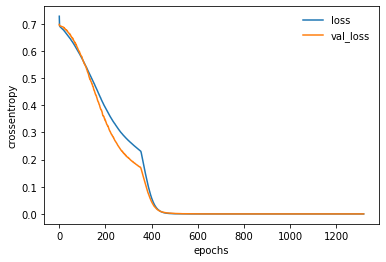

In [13]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()

### テストデータによる評価



In [14]:
Y_pred = model.predict(X_test)

# 二値分類は予測結果の確率が0.5以下なら0, 
# それより大きければ1となる計算で求める
Y_pred_cls = (Y_pred > 0.5).astype("int32")

In [15]:
Y_pred

array([[1.46897292e-15],
       [5.00660735e-10],
       [1.00000000e+00],
       [6.41629257e-16],
       [1.00000000e+00],
       [2.70861119e-17],
       [1.00000000e+00],
       [1.65514824e-12],
       [2.10781696e-12],
       [7.86360005e-11],
       [1.04717287e-13],
       [3.50582085e-12],
       [1.05379993e-11],
       [2.40886976e-12],
       [3.06768044e-12],
       [1.00000000e+00],
       [3.50582085e-12],
       [3.24854588e-11],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.57282969e-14],
       [3.50582085e-12],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.78622742e-13],
       [1.00000000e+00],
       [9.99998987e-01],
       [2.55089283e-11],
       [1.64269718e-08],
       [1.00000000e+00],
       [1.29151755e-14],
       [3.50582085e-12],
       [1.00000000e+00],
       [1.22732716e-13],
       [7.52014379e-16],
       [6.17483634e-11],
       [1.00000000e+00],
       [1.99046237e-13],
       [1.08073836e-11],
       [1.45745596e-10],


In [16]:
Y_pred_cls

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [17]:
Y_pred_ = Y_pred_cls.reshape(-1)  #形状を目的変数の形状に合わせています。

# モデルの評価

In [18]:
# モデルの評価
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

